# Image Sizes Notebook

### Objectives

- Show distribution of image sizes
- Show mean image size
- Set size of images

### Inputs

- inputs/brain_tumour_dataset/train

### Outputs

- Image shape embeddings file ({version}/image_shape.pkl)

### Install Requirments

In [1]:
%pip install -r /workspace/Brain_tumour_diagnostic/requirements.txt

Note: you may need to restart the kernel to use updated packages.


### Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread
from tensorflow.keras.preprocessing import image


### Change Working Directory

In [3]:
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
work_dir = os.getcwd()
work_dir

'/workspace/Brain_tumour_diagnostic'

In [4]:
my_data_dir = 'inputs/brain_tumour_dataset'
train_path = my_data_dir + '/train'

### Set Output Directory

In [5]:
version = 'v1'

In [6]:
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


### Set Labels

In [7]:
# Set the labels
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['glioma', 'healthy', 'meningioma', 'pituitary']


### Image Shape

Calculate average image size, and plot distribution 

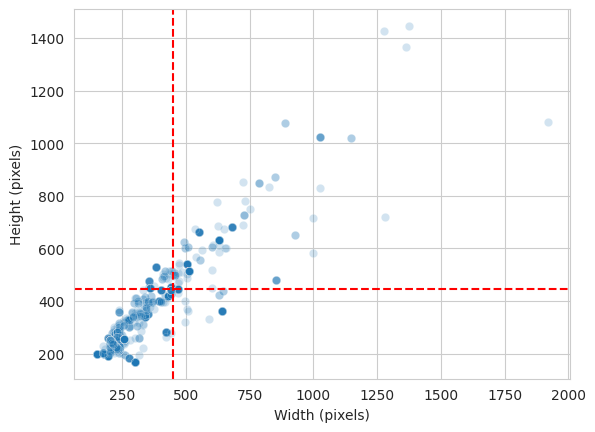

Width average: 445 
Height average: 447


In [8]:
dim1, dim2 = [], []
for label in labels:
    for image_filename in os.listdir(train_path + '/' + label):
        img = imread(train_path + '/' + label + '/' + image_filename)
        d1, d2, colors = img.shape
        dim1.append(d1)  # image height
        dim2.append(d2)  # image width

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean, color='r', linestyle='--')
axes.axhline(y=dim2_mean, color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")

### Set Image Shape

- Image sizes reduced to speed up the machine learning (and reduce the size of the model)

In [9]:
image_shape = (round(dim1_mean/2), round(dim2_mean/2), 3)
image_shape

(224, 222, 3)

- Save image shape

In [10]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['outputs/v1/image_shape.pkl']

# Conclusions

- After initial model training, the image size was reduced by a factor of 4 (factor of 2 in each axis), to reduce the model size and the number of parameters
- The average image size also appears to be overestimated due to some outliers
- Adding a convolution layer could reduce the final number of parameters, however the training time would my be increased

# Next Steps

- Show image variability for all labels
- Show average differences between labels